In [69]:
import torch
import torch.nn as nn 
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
device='cuda' if torch.cuda.is_available() else 'cpu'


In [70]:
data_df=pd.read_csv('C:/Users/nihal/Downloads/archive/riceClassification.csv')
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [71]:
data_df.dropna(inplace=True)

#data_df.drop(['id'], axis=1,inplace=True)
data_df.head

<bound method NDFrame.head of           id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
0          1  4537        92.229316        64.012769      0.719916   
1          2  2872        74.691881        51.400454      0.725553   
2          3  3048        76.293164        52.043491      0.731211   
3          4  3073        77.033628        51.928487      0.738639   
4          5  3693        85.124785        56.374021      0.749282   
...      ...   ...              ...              ...           ...   
18180  18181  5853       148.624571        51.029281      0.939210   
18181  18182  7585       169.593996        58.141659      0.939398   
18182  18183  6365       154.777085        52.908085      0.939760   
18183  18184  5960       151.397924        51.474600      0.940427   
18184  18185  6134       153.081981        51.590606      0.941500   

       ConvexArea  EquivDiameter    Extent  Perimeter  Roundness  \
0            4677      76.004525  0.657536    273.085   0.764

In [72]:
original_df=data_df.copy()
for column in data_df.columns:
    data_df[column]=data_df[column]/data_df[column].max()
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.000055,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.000110,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.000165,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.000220,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.000275,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [73]:
X= np.array(data_df.iloc[:, :-1])
Y= np.array(data_df.iloc[:,-1])

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [75]:
X_val, X_test_final, Y_val, Y_test_final = train_test_split(X_test, Y_test, test_size=0.5, random_state=42) 

In [76]:
print("X_train shape:", X_train.shape)
print("X_test_final shape:", X_test_final.shape)
print("X_val shape:", X_val.shape)

X_train shape: (12729, 11)
X_test_final shape: (2728, 11)
X_val shape: (2728, 11)


In [77]:
class dataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X, dtype=torch.float32).to(device)
        self.Y = torch.tensor(Y, dtype=torch.float32).to(device)        
        
    def __getitem__(self, index):
        return self.X[index], self.Y[index]
    
    def __len__(self):
        return len(self.X)

In [78]:
training_data=dataset(X_train, Y_train)
validation_data=dataset(X_val, Y_val)
test_data=dataset(X_test_final, Y_test_final)

In [79]:
train_dataloader=DataLoader(training_data, batch_size=8, shuffle=True)
val_dataloader=DataLoader(validation_data, batch_size=8, shuffle=False)
test_dataloader=DataLoader(test_data, batch_size=8, shuffle=False)

In [80]:
Hidden_Neurons=10
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel,self).__init__()

        self.input_layer=nn.Linear(X.shape[1], Hidden_Neurons)
        self.linear=nn.Linear(Hidden_Neurons, 1)
        self.sigmoid=nn.Sigmoid()

    def forward(self,x):
        x=self.input_layer(x)
        x=self.linear(x)
        x=self.sigmoid(x)
        return x
model=MyModel().to(device)

In [81]:
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             120
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 131
Trainable params: 131
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [82]:
criterion=nn.BCELoss()
optimizer=Adam(model.parameters(), lr=0.001)

In [83]:
total_loss_train=[]
total_loss_val=[]
total_acc_train=[]
total_acc_val=[]    
epochs=5 

for epoch in range(epochs):
    total_acct=0
    total_losst=0
    total_accv=0
    total_lossv=0

    for data in train_dataloader:
        inputs, labels = data
        presidtions = model(inputs).squeeze(1)
        loss = criterion(presidtions, labels)
        total_losst+=loss.item()
        acc=(presidtions.round()==labels).sum().item()
        total_acct+=acc
        loss.backward()
        optimizer.step()    
        optimizer.zero_grad()
    
    with torch.no_grad():
        for data in val_dataloader:
            inputs, labels = data
            presidtions = model(inputs).squeeze(1)
            loss = criterion(presidtions, labels)
            total_lossv+=loss.item()
            acc=(presidtions.round()==labels).sum().item()
            total_accv+=acc 
    total_loss_train.append(total_losst/len(train_dataloader))
    total_loss_val.append(total_lossv/len(val_dataloader))
    total_acc_train.append(total_acct/len(training_data))
    total_acc_val.append(total_accv/len(validation_data))
    print(f"Epoch {epoch+1}, Train Loss: {total_losst/len(train_dataloader):.4f}, Val Loss: {total_lossv/len(val_dataloader):.4f}, Train Acc: {total_acct/len(training_data):.4f}, Val Acc: {total_accv/len(validation_data):.4f}")
    print("="*30)

Epoch 1, Train Loss: 0.2798, Val Loss: 0.0439, Train Acc: 0.9555, Val Acc: 0.9996
Epoch 2, Train Loss: 0.0201, Val Loss: 0.0078, Train Acc: 0.9997, Val Acc: 1.0000
Epoch 3, Train Loss: 0.0049, Val Loss: 0.0025, Train Acc: 0.9999, Val Acc: 1.0000
Epoch 4, Train Loss: 0.0018, Val Loss: 0.0010, Train Acc: 0.9999, Val Acc: 1.0000
Epoch 5, Train Loss: 0.0009, Val Loss: 0.0004, Train Acc: 0.9999, Val Acc: 1.0000


In [84]:
with torch.no_grad():
    total_acct=0
    total_losst=0
    for data in test_dataloader:
        inputs, labels = data
        presidtions = model(inputs).squeeze(1)
        loss = criterion(presidtions, labels)
        total_losst+=loss.item()
        acc=(presidtions.round()==labels).sum().item()
        total_acct+=acc
    print(f"Test Loss: {total_losst/len(test_dataloader):.4f}, Test Acc: {total_acct/len(test_data):.4f}")

Test Loss: 0.0006, Test Acc: 1.0000


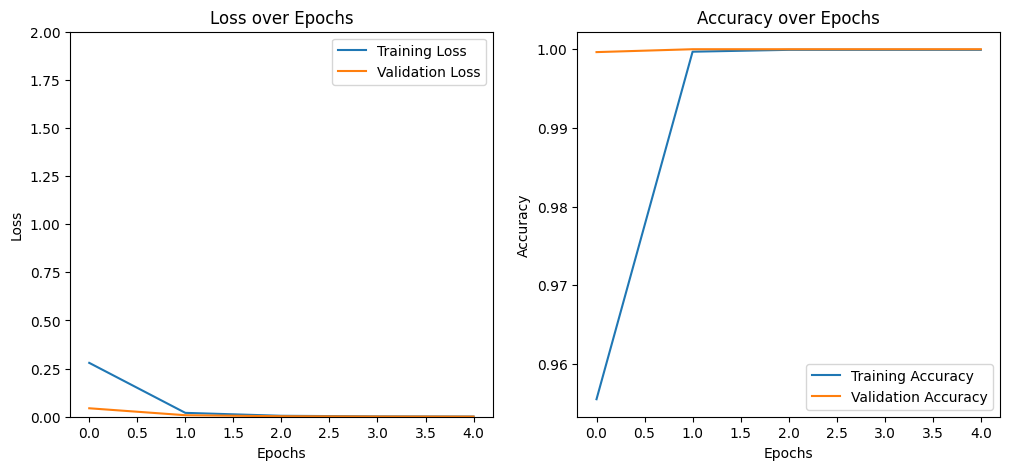

In [86]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(total_loss_train, label='Training Loss')
axs[0].plot(total_loss_val, label='Validation Loss')
axs[0].set_title('Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim(0, 2)
axs[0].legend()

axs[1].plot(total_acc_train, label='Training Accuracy')
axs[1].plot(total_acc_val, label='Validation Accuracy')
axs[1].set_title('Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
#axs[1].set_ylim(0, 1)
axs[1].legend()

plt.show()
